# Numpy and Regression

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import koreanize_matplotlib

%matplotlib inline

In [3]:
!pip install matplotlib

In [4]:
!pip install koreanize_matplotlib

#### 데이터 불러오기

In [8]:
# 데이터 불러오기
prl_data = pd.read_csv('../data/premierleague.csv').to_numpy()
prl_data

array([['Manchester City', 106, 27, 100],
       ['Manchester United', 68, 28, 81],
       ['Tottenham Hotspur', 74, 36, 77],
       ['Liverpool', 84, 38, 75],
       ['Chelsea', 62, 38, 70],
       ['Arsenal', 74, 51, 63],
       ['Burnley', 36, 39, 54],
       ['Everton', 44, 58, 49],
       ['Leicester City', 56, 60, 47],
       ['Newcastle United', 39, 47, 44],
       ['Crystal Palace', 45, 55, 44],
       ['Bournemouth', 45, 61, 44],
       ['West Ham United', 48, 68, 42],
       ['Watford', 44, 64, 41],
       ['Brighton and Hove Albion', 34, 54, 40],
       ['Huddersfield Town', 28, 58, 37],
       ['Southampton', 37, 56, 36],
       ['Swansea City', 28, 56, 33],
       ['Stoke City', 35, 68, 33],
       ['West Bromwich Albion', 31, 56, 31]], dtype=object)

In [9]:
pd.read_csv('../data/premierleague.csv').head(1)

,name,gf,ga,points
0,Manchester City,106,27,100


- gf 득점 
- ga 실점
- points 승점

In [14]:
prl_data[:1]

array([['Manchester City', 106, 27, 100]], dtype=object)

#### 1등~4등팀이 어디인가요?

In [15]:
prl_data[:4]

array([['Manchester City', 106, 27, 100],
       ['Manchester United', 68, 28, 81],
       ['Tottenham Hotspur', 74, 36, 77],
       ['Liverpool', 84, 38, 75]], dtype=object)

#### 득점 
- np.uint8

In [16]:
gf = prl_data[:, 1].astype(np.uint8)

#### 실점

In [17]:
ga = prl_data[:, 2].astype(np.uint8)

#### 승점

In [18]:
point = prl_data[:, 3].astype(np.uint8)

#### 선형회귀모델

#### (1) 선형회귀모델 불러오기 

In [19]:
from sklearn.linear_model import LinearRegression

#### (2) x, y 설정 
- x -> 득점 
- y -> 승점

In [20]:
x = gf.reshape(-1, 1)
y = point

#### (3) 모델 학습

In [21]:
model = LinearRegression()

In [22]:
model.fit(x, y)

LinearRegression()

#### (4) 물어보세요
- 94점
- 88점

In [23]:
model.predict(np.array([70]).reshape(-1, 1))

array([68.32242812])

In [24]:
len(x)

20

In [32]:
next_season = np.random.randint(30, 100, 20).astype(np.uint8)
model.predict(next_season.reshape(-1, 1))

array([71.73026647, 69.1743877 , 42.7636405 , 55.54303431, 77.69398358,
       58.95087266, 75.9900644 , 66.61850894, 82.8057411 , 73.43418564,
       56.39499389, 72.58222605, 86.21357945, 57.24695348, 41.91168091,
       43.61560009, 76.84202399, 87.91749862, 68.32242812, 89.6214178 ])

In [33]:
gf_predic = model.predict(gf.reshape(-1, 1))

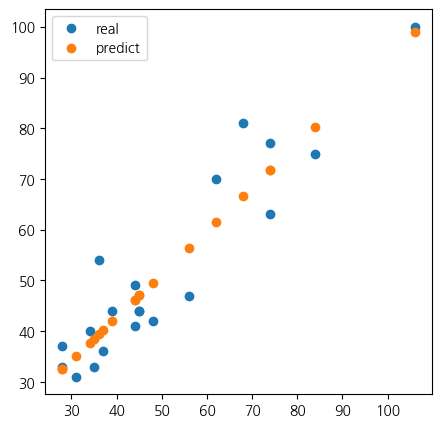

In [34]:
plt.figure(figsize=(5, 5))

plt.scatter(gf, point, label='real')
plt.scatter(gf, gf_predic, label='predict')

plt.legend()
plt.show();